In [86]:
#Getting the data from the csv files
import pandas as pd
data = pd.read_csv("diabetes.csv")
data_glass = pd.read_csv("glass.csv")
Y = data["class"]
X = data.drop(["class"], axis = 1)
Y_glass = data_glass["class"]
X_glass = data_glass.drop(["class"], axis = 1)

In [87]:
#Splitting the data into training and test sets and writing a function to compute the average accuracies over n runs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
def getAverageAccuracy(data_x, data_y, classifier, n):
    accuracies_test = 0
    accuracies_train = 0
    for i in range(0, n):
        #Splitting
        X_train, X_test, Y_train, Y_test = train_test_split(data_x, data_y, test_size=0.34, random_state=10)
        #Fitting
        classifier = classifier.fit(X_train, Y_train)
        #Predicting
        predictions_test = classifier.predict(X_test)
        predictions_train = classifier.predict(X_train)
        #Computing the accuracy
        accuracies_test += accuracy_score(Y_test, predictions_test)
        accuracies_train += accuracy_score(Y_train, predictions_train)
    avg_acc_test = accuracies_test / n
    avg_acc_train = accuracies_train / n
    return (avg_acc_test, avg_acc_train)

In [88]:
#Initializing the classifiers
from sklearn import tree as skt
one_level_classifier = skt.DecisionTreeClassifier(criterion = "entropy", max_depth = 1)
multi_level_classifier = skt.DecisionTreeClassifier(criterion = "entropy", max_depth = None)
one_level_classifier_glass = skt.DecisionTreeClassifier(criterion = "entropy", max_depth = 1)
multi_level_classifier_glass = skt.DecisionTreeClassifier(criterion = "entropy", max_depth = None)

In [89]:
#Getting the classifiers' accuracies
runs = 30
accuracy_one = getAverageAccuracy(X, Y, one_level_classifier, runs)
accuracy_multi = getAverageAccuracy(X, Y, multi_level_classifier, runs)
accuracy_one_glass = getAverageAccuracy(X_glass, Y_glass, one_level_classifier, runs)
accuracy_multi_glass = getAverageAccuracy(X_glass, Y_glass, multi_level_classifier, runs)

In [90]:
#And printing them
print("Average accuracy of one-level-classifier (trained and tested on diabetes data): %s" % accuracy_one[0])
print("Average accuracy of multi-level-classifier (trained and tested on diabetes data): %s" % accuracy_multi[0])
print("Average accuracy of one-level-classifier (trained and tested on glass data): %s" % accuracy_one_glass[0])
print("Average accuracy of multi-level-classifier (trained and tested on glass data): %s" % accuracy_multi_glass[0])

Average accuracy of one-level-classifier (trained and tested on diabetes data): 0.7213740458015265
Average accuracy of multi-level-classifier (trained and tested on diabetes data): 0.7346055979643765
Average accuracy of one-level-classifier (trained and tested on glass data): 0.4246575342465756
Average accuracy of multi-level-classifier (trained and tested on glass data): 0.6219178082191782


#### Comparison and explainability(for task 4 c))
It can be observed that the one-level-classifier has a slightly worse accuracy (0.73 / 0.72 = 1.01388888889, so the multi-level-classifier is better by 1% for this case). This is to be expected, however, I thought the difference would be much more significant. This difference is explained by the multi-level-classifier's ability to make more splits (more levels), therefore increasing the number of "decision variables" so to speak.
For the glass dataset, the difference was more significant, since the multi-level-classifier outperforms the one-level-classifier by roughly 47.62%.
As far as explainability is concerned, they should be about equal, since decision trees are inherently explainable, no matter how deep they are, i.e. the ID3-algorithm is a "whitebox" algorithm: It works by splitting based on the information gain, which is highly deterministic, so no stochasticity whatsoever is involved in building the decision trees (Note: The only stochasticity is in splitting the data set, so not in building the trees themselves).

In [91]:
#Iterating over min_samples_leaf
points_x = []
points_y = []
points_x_glass = []
points_y_glass = []
points_x_train = []
points_y_train = []
points_x_glass_train = []
points_y_glass_train = []
for i in range(1, len(data["class"]), 5):
    #Initialize with min_samples_leaf = i
    multi_level_classifier = skt.DecisionTreeClassifier(criterion = "entropy", max_depth = None, min_samples_leaf = i)
    multi_level_classifier_glass = skt.DecisionTreeClassifier(criterion = "entropy", max_depth = None, min_samples_leaf = i)
    #Getting the accuracies...
    acc_diabetes = getAverageAccuracy(X, Y, multi_level_classifier, runs)
    acc_glass = getAverageAccuracy(X_glass, Y_glass, multi_level_classifier_glass, runs)
    #...on the validation set...:
    accuracy_test_diabetes = acc_diabetes[0]
    points_x.append(i)
    points_y.append(accuracy_test_diabetes)
    
    accuracy_test_glass = acc_glass[0]
    points_x_glass.append(i)
    points_y_glass.append(accuracy_test_glass)
    #...and on the training set:
    accuracy_train_diabetes = acc_diabetes[1]
    points_x_train.append(i)
    points_y_train.append(accuracy_train_diabetes)
    
    accuracy_train_glass = acc_glass[1]
    points_x_glass_train.append(i)
    points_y_glass_train.append(accuracy_train_glass)

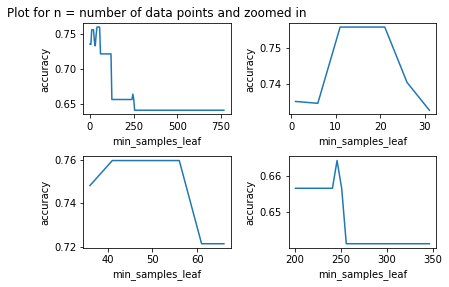

In [92]:
#Plotting the accuracies (note that those are still over the same training and test sets)
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2)
fig.tight_layout(pad=2.1)
axs[0, 0].set_title("Plot for n = number of data points and zoomed in")
axs[0,0].plot(points_x, points_y)
axs[0,1].plot(points_x[:7], points_y[:7])
axs[1,0].plot(points_x[7:14], points_y[7:14])
axs[1,1].plot(points_x[40:70], points_y[40:70])
for ax in axs.flat:
    ax.set(xlabel='min_samples_leaf', ylabel='accuracy')
plt.show()

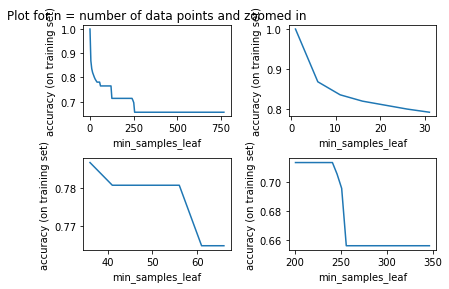

In [93]:
#Plotting the accuracies on the training data(note that those are still over the same training and test sets)
fig, axs = plt.subplots(2, 2)
fig.tight_layout(pad=2.1)
axs[0, 0].set_title("Plot for n = number of data points and zoomed in")
axs[0,0].plot(points_x_train, points_y_train)
axs[0,1].plot(points_x_train[:7], points_y_train[:7])
axs[1,0].plot(points_x_train[7:14], points_y_train[7:14])
axs[1,1].plot(points_x_train[40:70], points_y_train[40:70])
for ax in axs.flat:
    ax.set(xlabel='min_samples_leaf', ylabel='accuracy (on training set)')
plt.show()

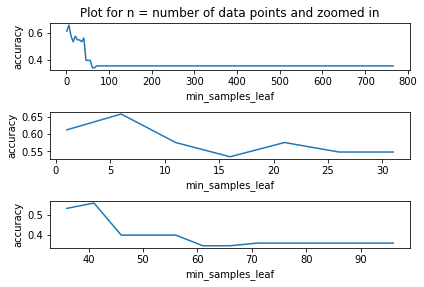

In [94]:
#Plotting the accuracies of the glass classifiers (note that those are still over the same training and test sets)
fig, axs = plt.subplots(3)
fig.tight_layout(pad=2.1)
axs[0].set_title("Plot for n = number of data points and zoomed in")
axs[0].plot(points_x_glass, points_y_glass)
axs[1].plot(points_x_glass[:7], points_y_glass[:7])
axs[2].plot(points_x_glass[7:20], points_y_glass[7:20])
for ax in axs.flat:
    ax.set(xlabel='min_samples_leaf', ylabel='accuracy')
plt.show()

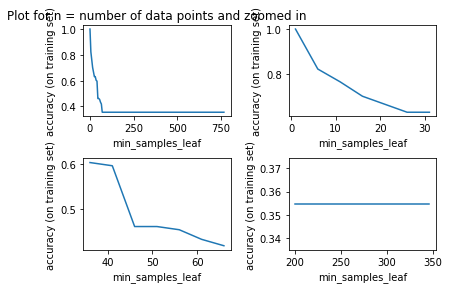

In [95]:
#Plotting the accuracies on the training data(note that those are still over the same training and test sets)
fig, axs = plt.subplots(2, 2)
fig.tight_layout(pad=2.1)
axs[0, 0].set_title("Plot for n = number of data points and zoomed in")
axs[0,0].plot(points_x_glass_train, points_y_glass_train)
axs[0,1].plot(points_x_glass_train[:7], points_y_glass_train[:7])
axs[1,0].plot(points_x_glass_train[7:14], points_y_glass_train[7:14])
axs[1,1].plot(points_x_glass_train[40:70], points_y_glass_train[40:70])
for ax in axs.flat:
    ax.set(xlabel='min_samples_leaf', ylabel='accuracy (on training set)')
plt.show()

### Task 4 d) (Diabetes data)
You can clearly see that on [1, 10], the accuracy increases, then on [11, 21] it stays the same (so for n = 11, 16 and 21, the accuracy does not change) and it decreases on [21, 31], after which it increases again on [30, 40] (I am not sure how this can be explained to be honest.). Then, the accuracy steadily decreases, until it reaches 0 at n = 256, which means that the model is terribly overfit at this point. The regions of overfitting therefore are [1, 10] and [26, 36], since in those regions, the model splits too much, overfitting the training data. Regions of optimality would therefore be [11, 21] and [41, 56], since there are maxima on these intervals. The region of underfitting then is [56:] (so from n = 56 until number of data points), since the accuracy steadily decreases here until it reaches 0 at n = 256. This is explained by the tree's inability to make enough splits to describe the training data well, because the higher the minimum number of samples required at each leaf is, the less possibilities you have for splitting. Interesting to note that there seems to be a little spike in accuracy at about n = 251, but I have again no idea how to explain this, maybe it has to do with how the accuracy is plotted. These regions can also be verified by looking at the accuracy on the training data, where regions of overfitting are the values of n where the accuracy is 1.

### Task 4 d) (Glass data)
Regions of overfitting are [0, 5], regions of optimality n = 6 and regions of underfitting on [7:]. Those were identified by the same logic as in the example above.

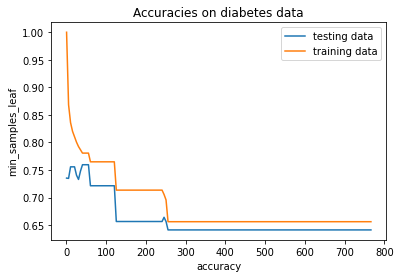

In [96]:
#Plotting the accuracies (prettier)
plt.title("Accuracies on diabetes data")
plt.plot(points_x, points_y, label = "testing data")
plt.plot(points_x_train, points_y_train, label = "training data")
plt.xlabel("accuracy")
plt.ylabel("min_samples_leaf")
plt.legend()
plt.show()

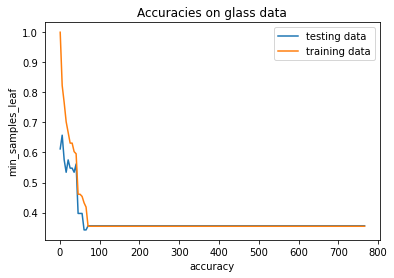

In [97]:
#Plotting the accuracies (prettier)
plt.title("Accuracies on glass data")
plt.plot(points_x_glass, points_y_glass, label = "testing data")
plt.plot(points_x_glass_train, points_y_glass_train, label = "training data")
plt.xlabel("accuracy")
plt.ylabel("min_samples_leaf")
plt.legend()
plt.show()